# Лінійна регресія

### Я працюватиму з набором даних про рівень щастя у країнах за 2019 рік. Дані брала  з Kaggle [змагання](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv).

0. Імпорт бібліотек.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 10

1. Завантажую дані у змінну `df`.

In [ ]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


2. Виводжу діаграму розсіювання ознак `Score` та `GDP per capita`, використовуючи метод `regplot()` з `seaborn`.

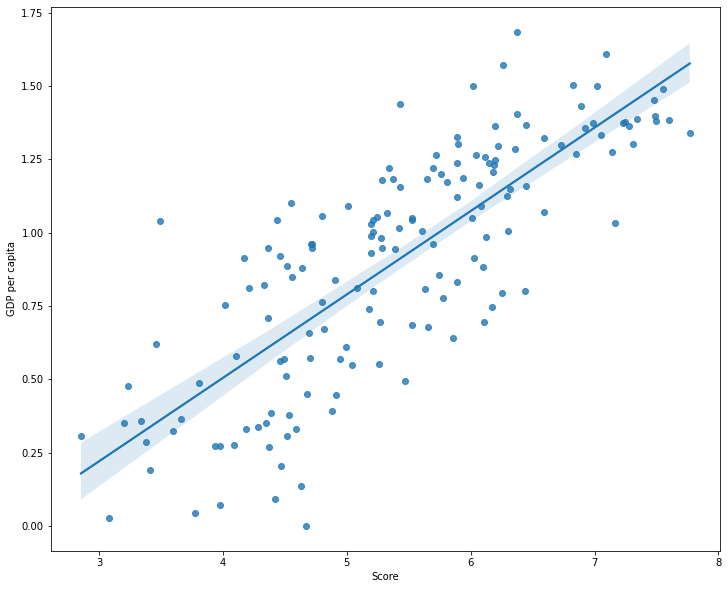

In [ ]:
sns.regplot(x = "Score", 
            y = "GDP per capita", 
            data = df);


Судячи з діаграми розсіювання, залежність між цими двома змінними має добре описуватись лінійною моделлю. Тому для початку я моделюватиму цю залежність. Тобто незалежною змінною буде `GDP per capita`, а залежною - `Score`. 

## Розв'язання задачі лінійної регресії методом градієнтного спуску

Позначення:
- `X` - матриця ознак
- `y` - цільова змінна
- `theta` - вектор параметрів
- `alpha` - темп навчання (learning rate)

3. Спробую реалізувати формулу передбачення лінійної регресії у методі `predict`. Метод повертатиме передбачення. Для кожного спостереження з матриці ознак передбачення можна знайти за допомогою наступної формули:
$$x \in X, i \in [1,m], j : \\ \hat{y}_i = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n = \theta^T x ,\\
\text{где m - кількість спостережень, } \\ 
\text{n - кількість ознак, } \\
x_0 = 1 \ \text{для всіх спостережень}.
$$

Передбачення всіх спостережень у матриці Х можна знайти як множення матриці ознак на ваги.

In [ ]:
def predict(X, theta):
    prediction = X.dot(theta)
    return prediction

4. Напишу метод, який рахуватиме функцію втрат.  
Метод `cost()` приймає вектор параметрів `theta`, матрицю ознак `X` та реальні значення цільової змінної `y`.


In [ ]:
def cost(X, theta, y_true):
    m = len(y_1)
    cost_value =(1/2*m)*np.sum(np.square(predict(X, theta)-y_true))
    return cost_value

5. Напишу метод `get_gradient()`, який повертатиме вектор власних похідних функції втрат за кожним із параметрів лінійної регресії.


> Створю основний метод `gradient_descent()`, який дозволить реалізувати алгоритм градієтного спуску і включатиме в себе попередні допоміжні методи. Під час градієнтного спуку  параметри оновлюють згідно з формулою:



$$
\text{для кожного} \ j \in [0, n]: \quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta), \\ 
\text{де n - кількість ознак}
$$
> Метод градієнтного спуску оновлює ваги (модель навчається) поки вони не перестануть змінюватися від ітерації до ітерації, тобто поки Евклідова відстань  між векторами ваг за останні дві ітерації не буде меншою за невелику константу (епсілон).



In [ ]:
def get_gradient(X, y, y_estimate):
    error = y_estimate - y
    gradient = (1.0 / len(y)) * X.T.dot(error)
    return gradient

In [ ]:
def gradient_descent(X, y, theta, learning_rate, eps, max_iterations):
    cost_history = []
    theta_history = []
    iterations = 1
    while True:
        y_estimate = predict(X, theta)# передбачення з поточними значеннями вагів
        gradient = get_gradient(X, y, y_estimate)# значення приватних похідних функції витрат з поточними значеннями ваг
        cost_value = cost(X, theta, y)# значення функції витрат при поточних вагах
        cost_history.append(cost_value)
        new_theta = theta - learning_rate*gradient
        theta_history.append(new_theta)
        # Умова зупинки, описана в умові завдання
        if np.linalg.norm(new_theta - theta) < eps:
            print("Алгоритм зійшовся.")
            break
            
        # Друга умова зупинки
        if iterations >= max_iterations:
            print("Досягнуто максимальної кількості ітерацій")
            break

        # Виводимо інформацію кожні 100 ітерацій
        if iterations % 100 == 0:
            print ("Ітерація: %d - Помилка на трейн даних: %.4f" % (iterations, cost_value))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations


Підготую дані для моделі.

In [ ]:
X_1 = df['GDP per capita'].values.reshape(-1,1)
y_1 = df['Score'].values.reshape(-1,1)


6. Розділю `X` та `y` на `train` і `test` підвибірки у співвідношенні 80/20. Оскільки у нас мало даних, валідаційну вибірку не виділятиму. Запишу результати у `X_train`, `y_train`, `X_test`, `y_test`.

In [ ]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=test_size, shuffle=True, random_state=42)

print("Data shape for training:\n", "X:", X_train.shape, "y:", y_train.shape, "\n")
print("Data shape for testing:\n", "X:", X_test.shape, "y:", y_test.shape)

Data shape for training:
 X: (124, 1) y: (124, 1) 

Data shape for testing:
 X: (32, 1) y: (32, 1)


7. Реалізую масштабування ознак із використанням `MinMaxScaler`.

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X_train)
min_max_scaled_train = min_max_scaler.transform(X_train)
min_max_scaled_test = min_max_scaler.transform(X_test)


8. Додам колонку з одиниць до масивів `X_train`, `X_test`.

In [ ]:
X_train_1 = np.insert(min_max_scaled_train, 0, values=1, axis=1) # Insert values before column 0
X_test_1 = np.insert(min_max_scaled_test, 0, values=1, axis=1) # Insert values before column 0
X_train1_df =pd.DataFrame(X_train_1, columns=['x_0','x_1'])
X_test1_df =pd.DataFrame(X_test_1, columns=['x_0','x_1'])



9. Встановлю темп навчання рівний 0.01, точність епсілон рівний $10^{-6}$, кількість ітерацій - 20000 і запущу градієнтний спуск на тренувальних даних, передавши всі необхідні параметри.

In [ ]:
learning_rate = 0.01
max_iterations = 20000
epsilon = 10**(-6)

theta = np.random.randn(2,1)

theta, cost_history, theta_history, iterations = gradient_descent(X_train_1, y_train, theta, learning_rate, epsilon, max_iterations)

Ітерація: 100 - Помилка на трейн даних: 15750.7354
Ітерація: 200 - Помилка на трейн даних: 5126.1200
Ітерація: 300 - Помилка на трейн даних: 4344.5154
Ітерація: 400 - Помилка на трейн даних: 4286.2376
Ітерація: 500 - Помилка на трейн даних: 4281.1842
Ітерація: 600 - Помилка на трейн даних: 4280.1107
Ітерація: 700 - Помилка на трейн даних: 4279.3927
Ітерація: 800 - Помилка на трейн даних: 4278.7580
Ітерація: 900 - Помилка на трейн даних: 4278.1816
Ітерація: 1000 - Помилка на трейн даних: 4277.6569
Ітерація: 1100 - Помилка на трейн даних: 4277.1793
Ітерація: 1200 - Помилка на трейн даних: 4276.7445
Ітерація: 1300 - Помилка на трейн даних: 4276.3486
Ітерація: 1400 - Помилка на трейн даних: 4275.9882
Ітерація: 1500 - Помилка на трейн даних: 4275.6602
Ітерація: 1600 - Помилка на трейн даних: 4275.3615
Ітерація: 1700 - Помилка на трейн даних: 4275.0896
Ітерація: 1800 - Помилка на трейн даних: 4274.8420
Ітерація: 1900 - Помилка на трейн даних: 4274.6167
Ітерація: 2000 - Помилка на трейн даних

10. Візуалізую на лінійному графіку значення змінної `cost_history`. 

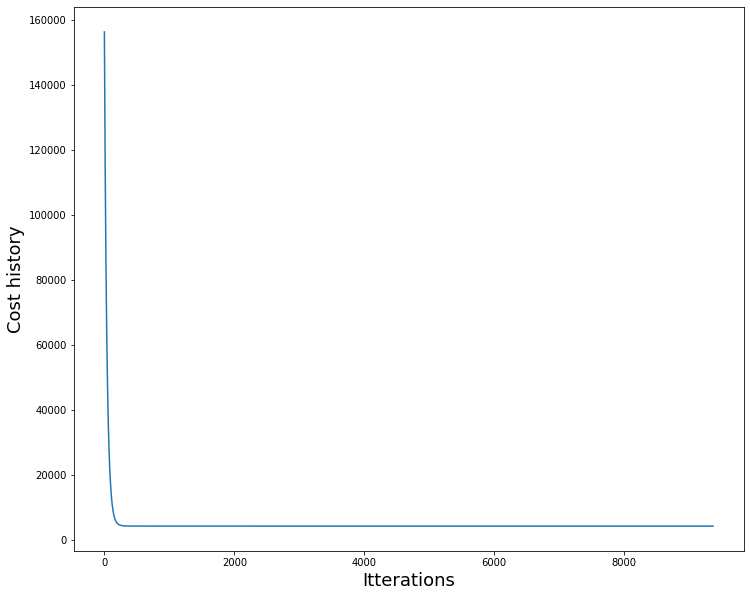

In [ ]:
iter = range(len(cost_history))
plt.plot(iter,cost_history)
plt.ylabel("Cost history", fontsize=18)
plt.xlabel("Itterations", fontsize=18);

Відображу лише перші 200 ітерацій. Схоже, що після них модель мало навчається. 

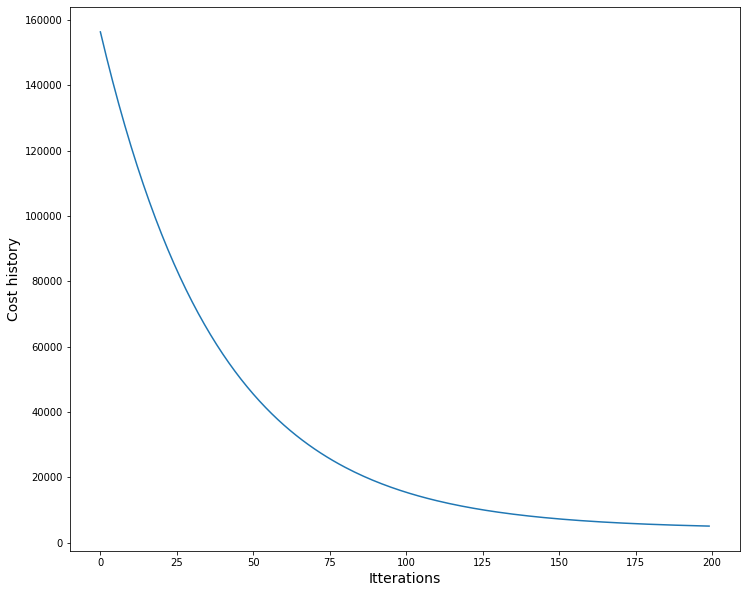

In [ ]:
sns.lineplot(cost_history[:200])
plt.ylabel("Cost history",fontsize=14)
plt.xlabel("Itterations", fontsize=14);

Виведу отримані параметри та останнє значення функції витрат.

In [ ]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][-1],theta[1][-1]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Number of iterateions: {:d}'.format(iterations))

Theta0:          3.420,
Theta1:          3.712
Final cost/MSE:  4272.329
Number of iterateions: 9370


11. Виведу прогнози на `X_train_df`, `X_test_df` та `mean_squared_error` помилку прогнозів в обох підвибірках.

In [ ]:
round_number = 5
def get_mse(y_train, y_train_pred,y_test, y_test_pred):
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  return {'mse_train': round(mse_train, round_number), 'mse_test': round(mse_test, round_number)}
  


In [ ]:
theta_vect = [theta[0][-1], theta[1][-1]]
y_train_pred = predict(X_train1_df, theta_vect)
y_test_pred = predict(X_test1_df, theta_vect)


get_mse(y_train, y_train_pred, y_test, y_test_pred)


{'mse_train': 0.44172, 'mse_test': 0.50788}

12. Виведу діаграму розсіювання ознак `Score` та `GDP per capita` та додам лінію прогнозу моделі.

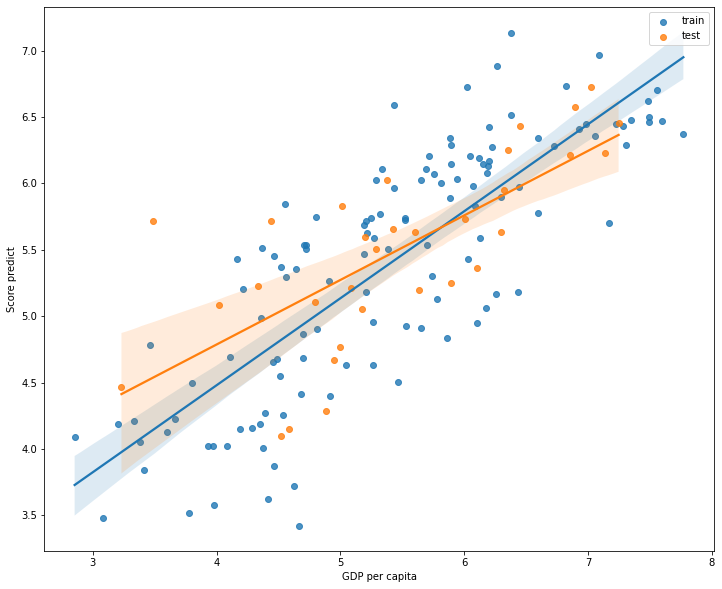

In [ ]:
sns.regplot(x=y_train, y=y_train_pred, label='train')
sns.regplot(x=y_test, y=y_test_pred, label='test')
plt.ylabel("Score predict")
plt.xlabel("GDP per capita")
plt.legend();

13. Тепер пророблю це все з використанням LinearRegression з sklearn. А саме - навчу лінійну регресію на наборі даних, що складається тільки з ознаки `GDP per capita`.   


In [ ]:
lin_model = LinearRegression()
lin_model.fit(min_max_scaled_train, y_train)

y_train_pred_skl = lin_model.predict(min_max_scaled_train)
y_test_pred_skl = lin_model.predict(min_max_scaled_test)

get_mse(y_train, y_train_pred_skl,y_test, y_test_pred_skl)
 



{'mse_train': 0.44172, 'mse_test': 0.50791}

Порівняю помилку на тестовій вибірці лінійної регресії, написаної мною, та зі sklearn. 

In [ ]:
print("Eror using gradient descend:", get_mse(y_train, y_train_pred, y_test, y_test_pred)['mse_test'])
print("Eror using sklearn:", get_mse(y_train, y_train_pred_skl,y_test, y_test_pred_skl)['mse_test'])

Eror using gradient descend: 0.50788
Eror using sklearn: 0.50791


14. На наступному етапі хотілося б врахувати більше ознак, і тим самим підвищити точність моделі. 

14.1 Здійсню навчання лінійної регресії з sklearn використовуючи наступний набір ознак: `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption`



In [ ]:
#Функція для отримання індексів ознак
def get_indeces(X):
  train_id, test_id = train_test_split(X.index, test_size=test_size, shuffle=True, random_state=42)
  return train_id, test_id

X_m = df.drop(['Overall rank', 'Country or region', 'Score'], axis=1)
y_m = df['Score']

#Поділ на тренувальну і тестову вибірку
test_size = 0.2
train_id, test_id = get_indeces(X_m)

#Масштабування ознак
multi_min_max_scaler = MinMaxScaler(feature_range=(0, 1))
multi_min_max_scaler.fit(X_m.loc[train_id])
multi_min_max_scaled = multi_min_max_scaler.transform(X_m)
multi_min_max_scaled_df = pd.DataFrame(multi_min_max_scaled, columns=X_m.columns)

multi_lr = LinearRegression()
multi_lr.fit(multi_min_max_scaled_df.loc[train_id], y_m.loc[train_id])

LinearRegression()

14.2 Виведу помилку прогнозу на `train` та `test` вибірках. Порівняю з результатом, отриманим під час навчання однією ознакою. 

In [ ]:
multi_y_train_pred_skl = multi_lr.predict(multi_min_max_scaled_df.loc[train_id])
multi_y_test_pred_skl = multi_lr.predict(multi_min_max_scaled_df.loc[test_id])

get_mse(y_m.loc[train_id], multi_y_train_pred_skl,y_m.loc[test_id], multi_y_test_pred_skl)


{'mse_train': 0.23647, 'mse_test': 0.41446}

При додавані більше ознак до регресійної моделі метрики змінилися в кращу сторону (на тестових даних з 0.507 до 0.414). Модель покращилася, це підтверджує правильність вибору саме тих ознак, які впливають на цільову змінну.


14.3 Виведу коефіцієнти моделі і визначу, які ознаки мають найбільші коефіцієнти по модулю, що стоять перед ними.

In [ ]:
feature_importance_df = pd.DataFrame(multi_lr.coef_, index=X_m.columns, columns=['Importance'])
#print("Intercept:", round(multi_lr.intercept_, round_number))
feature_importance_df

,Importance
GDP per capita,1.264207
Social support,2.001295
Healthy life expectancy,1.062208
Freedom to make life choices,0.940072
Generosity,0.153034
Perceptions of corruption,0.503931


Найважливіші ознаки для аналізу це "Social support", "GDP per capita", "Healthy life expectancy", "Freedom to make life choices".

15. Тепер навчу модель поліноміальної регресії зі ступенем 2 на тих самих даних, що й у попередньому пункті. В процесі навчання використовуватиму `PolynomialFeatures`. 

In [ ]:

degree = 2
poly_features = PolynomialFeatures(degree=degree)
poly_X_m_train = poly_features.fit_transform(multi_min_max_scaled_df.loc[train_id])
poly_X_m_test = poly_features.fit_transform(multi_min_max_scaled_df.loc[test_id])

poly_model = LinearRegression()
poly_model.fit(poly_X_m_train, y_m.loc[train_id])

poli_y_train_pred_skl = poly_model.predict(poly_X_m_train)
poli_y_test_pred_skl = poly_model.predict(poly_X_m_test)

get_mse(y_m[train_id], poli_y_train_pred_skl, y_m[test_id], poli_y_test_pred_skl)


{'mse_train': 0.35396, 'mse_test': 0.51702}

При степені 2 ще не відбувається перенавчання.

16. Напишу пайплайн із кроками `MinMaxScaler`, `PolynomialFeatures` та `ElasticNet`. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.2, random_state=42)
pipe = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('preprocessor', PolynomialFeatures(degree=2, include_bias=False)),
    ('estimator', ElasticNet())
])
pipe.fit(X_train, y_train)

y_pred_train_pipe = pipe.predict(X_train)
y_pred_test_pipe = pipe.predict(X_test)

get_mse(y_train, y_pred_train_pipe, y_test, y_pred_test_pipe)



{'mse_train': 1.27946, 'mse_test': 1.04443}

Найкращі значення середньоквадратичної помилки на тестових даних показала
лінійна регресія зі sklearn. Крім цього я наглядно побачила як додавання важливих ознак до моделі 
покращує якість передбачення.